# EXPLORATORY DATA ANALYSIS ON CARDIOGRAPHIC DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and Preparation:

#### read the data

In [3]:
data = pd.read_csv("./Cardiotocographic.csv")

### Statistical Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
data.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [6]:
data['DS'].nunique()

114

In [7]:
data['DP'].nunique()

264

### Remove duplicate rows

In [11]:
data.duplicated().sum()

2

In [12]:
data[data.duplicated(keep=False)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1113,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1457,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [13]:
data2 = data.copy()

In [14]:
data2.drop_duplicates(inplace = True)

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2103 non-null   float64
 1   AC        2104 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2103 non-null   float64
 6   DP        2103 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2103 non-null   float64
 11  Width     2103 non-null   float64
 12  Tendency  2103 non-null   float64
 13  NSP       2103 non-null   float64
dtypes: float64(14)
memory usage: 248.9 KB


####  Handle NULL values through imputation

In [16]:
data2.fillna({'LB':data2['LB'].mean(), 
              'AC':data2['AC'].mean(), 
              'DS': data2['DS'].mean(),
              'DP': data2['DP'].mean(),
              'MLTV': data2['MLTV'].mean(),
              'NSP': data2['NSP'].mean(),
              'Tendency': data2['Tendency'].mean(),
              'Width': data2['Width'].mean()}, inplace=True)

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2124 non-null   float64
 1   AC        2124 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2124 non-null   float64
 6   DP        2124 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2124 non-null   float64
 11  Width     2124 non-null   float64
 12  Tendency  2124 non-null   float64
 13  NSP       2124 non-null   float64
dtypes: float64(14)
memory usage: 248.9 KB


#### reset index

In [18]:
data2.reset_index(drop=True,inplace=True)

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2124 non-null   float64
 1   AC        2124 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2124 non-null   float64
 6   DP        2124 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2124 non-null   float64
 11  Width     2124 non-null   float64
 12  Tendency  2124 non-null   float64
 13  NSP       2124 non-null   float64
dtypes: float64(14)
memory usage: 232.4 KB


In [20]:
data2.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.736420,42.726905,0.642653,0.641660
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


## Data Visualization
### Histogram for numerical features

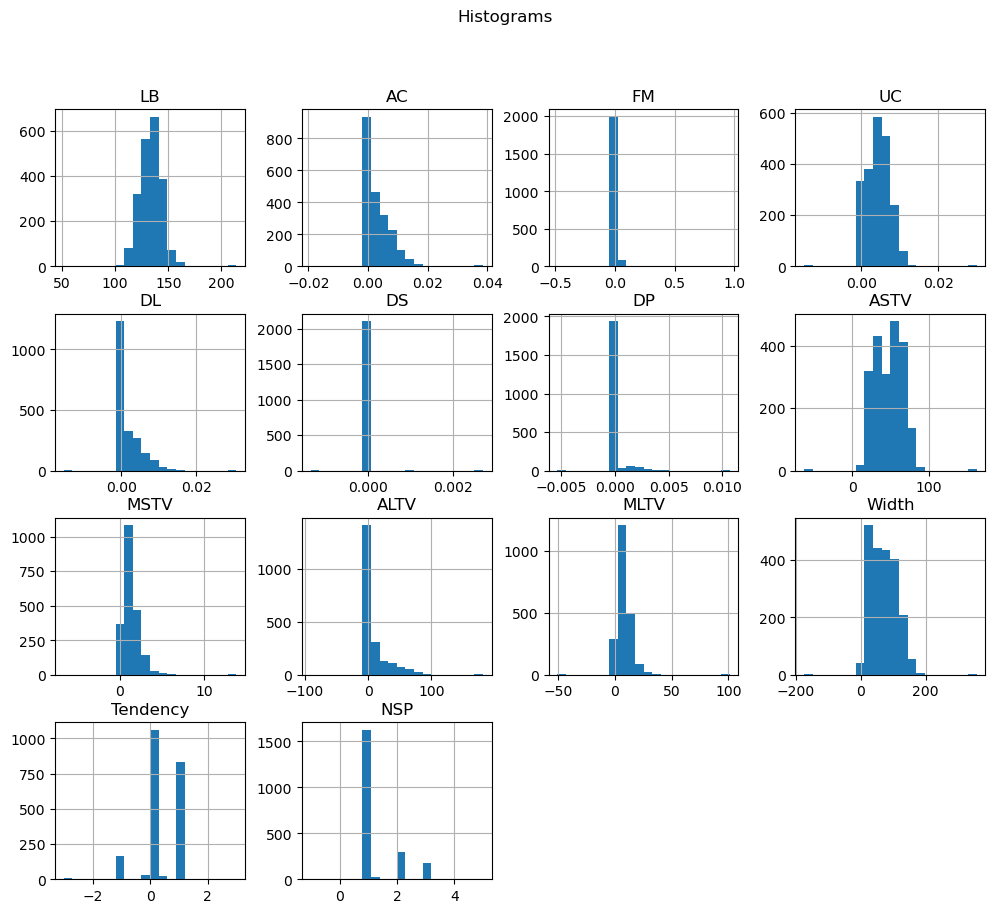

In [28]:
data2.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms")
plt.show()

### Insights from Histograms

Many clinical indicators like AC, UC, DL, DS, DP have sparse events (mostly zeros) with occasional high values, common in fetal monitoring where such events are infrequent but important when they occur.

Variables like LB, ASTV, Width exhibit more bell-shaped or near-normal distributions, making them more suitable for parametric modeling.

The presence of skewness in multiple variables suggests that log transformations or scaling might be considered for better model performance or normalization before further statistical analyses.



#### Check Unique Values (to detect categorical-like variables)

In [39]:
for col in data2.columns:
    print(f"{col}: {data2[col].nunique()}")

LB: 154
AC: 1068
FM: 776
UC: 1364
DL: 822
DS: 115
DP: 265
ASTV: 183
MSTV: 165
ALTV: 195
MLTV: 352
Width: 262
Tendency: 112
NSP: 112


#### -> no categorical like variables present

### Pairplot

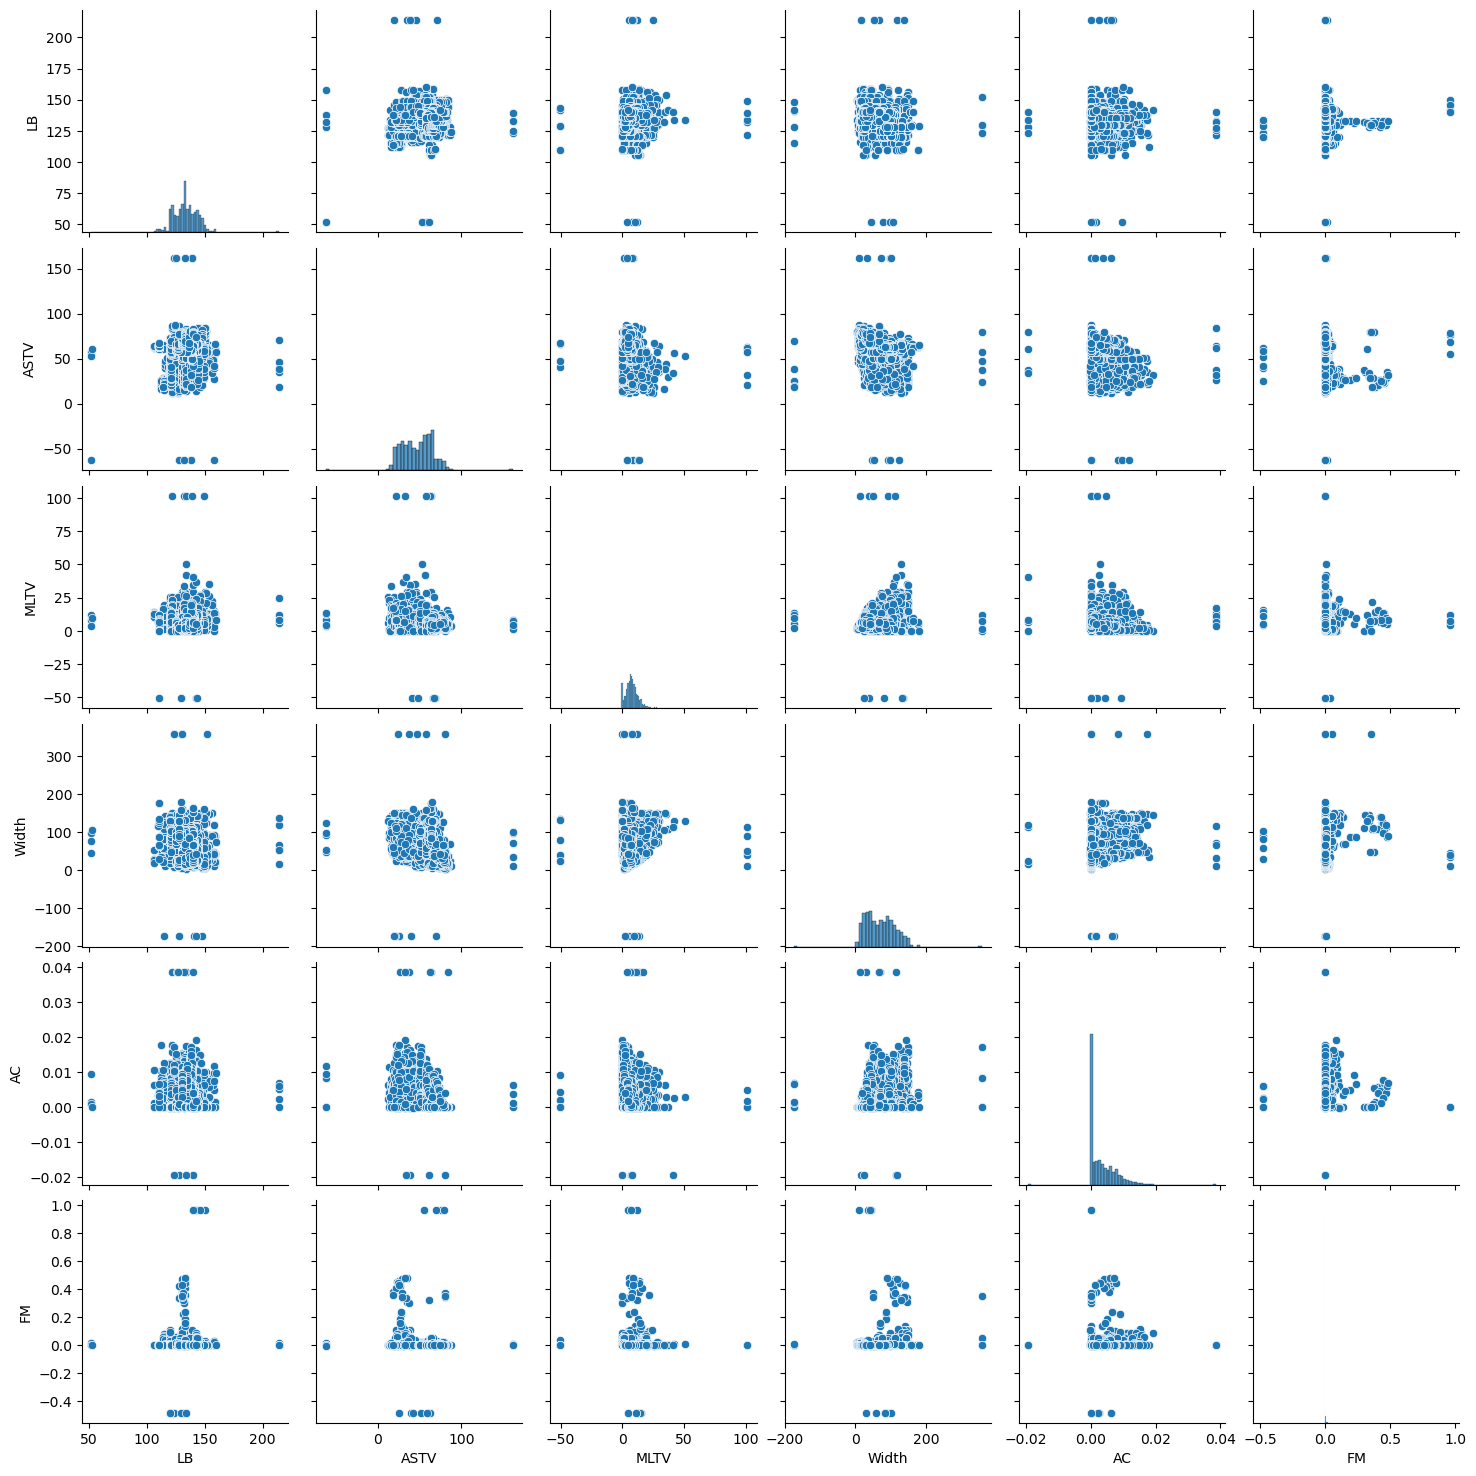

In [40]:
cols = ['LB', 'ASTV', 'MLTV', 'Width', 'AC', 'FM']
sns.pairplot(data2[cols])
plt.show()

### Insight
The pairplot reveals that the dataset contains several variables with weak to moderate pairwise relationships, and many of the distributions appear to be non-normal with a noticeable presence of outliers. Features such as Width, MSTV, and LB show higher variance and a wider spread of values, indicating potential influence on model behavior. In contrast, features like AC and FM appear to be sparse or concentrated in narrow value ranges, suggesting limited variability that may reduce their usefulness in some analytical models.

### Scatter Plots

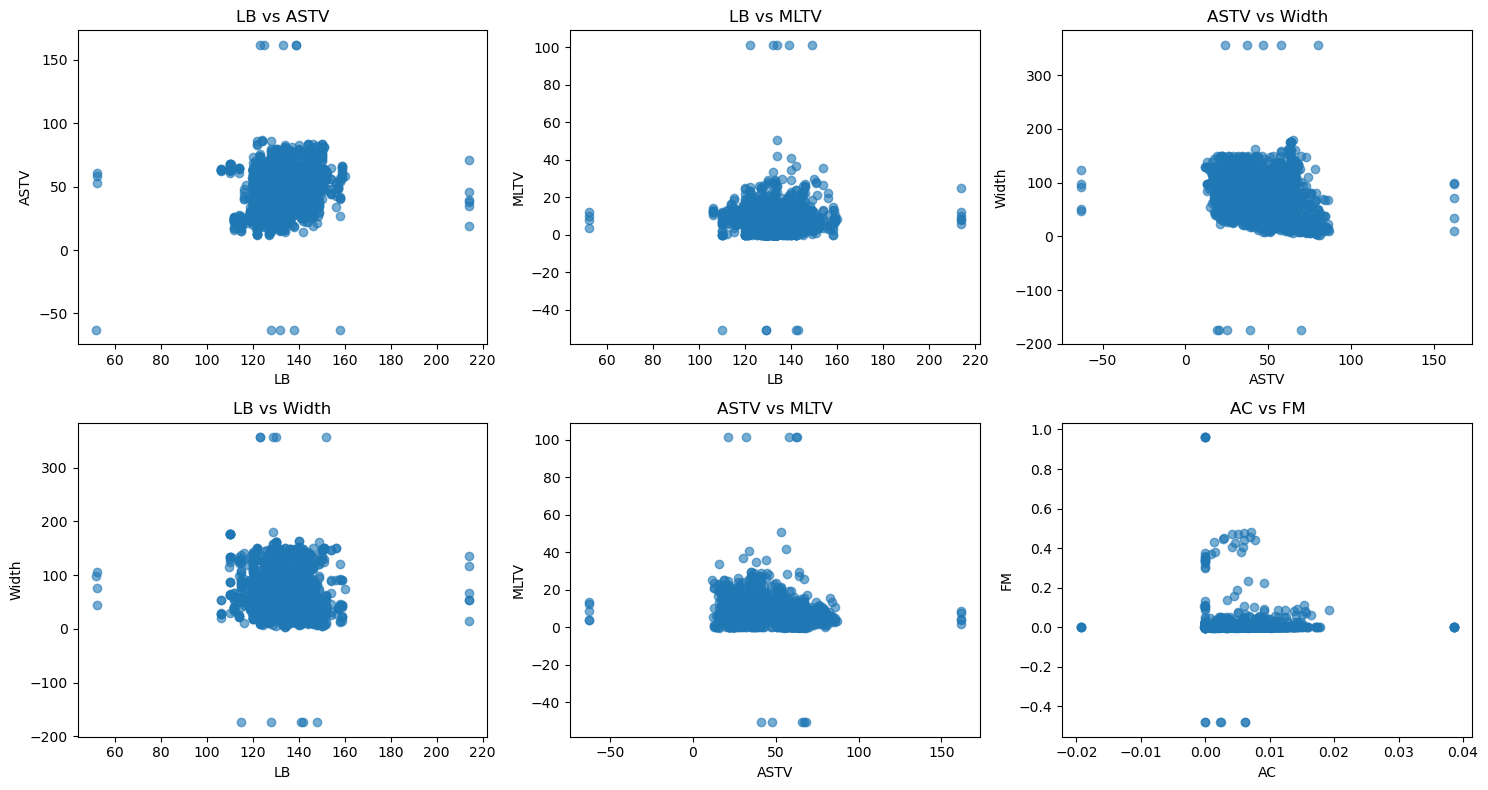

In [41]:
pairs = [('LB', 'ASTV'), ('LB', 'MLTV'), ('ASTV', 'Width'),
         ('LB', 'Width'), ('ASTV', 'MLTV'), ('AC', 'FM')]

# Define grid size
n_rows = 2
n_cols = 3

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot each pair
for i, (x, y) in enumerate(pairs):
    axes[i].scatter(data2[x], data2[y], alpha=0.6)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

### Insights:

The scatter plots reveal that the dataset is primarily composed of a dense core of typical observations with a few extreme outliers. The relationships among features are mostly non-linear or weakly correlated, and some variables exhibit sparsity or discretization. These insights suggest that careful data preprocessing, such as outlier handling, scaling, and possibly applying non-linear models or transformations, will be important for downstream analysis and modeling.

## Correlation Analysis

In [29]:
data2.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063452,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.104658,0.234720,0.031896,-0.312189
FM,0.018809,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018408,0.073991
UC,-0.166642,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.185542
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023759,0.025095
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036652,-0.094634
ALTV,0.210673,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036504,0.365218


## Outlier detection using boxplot

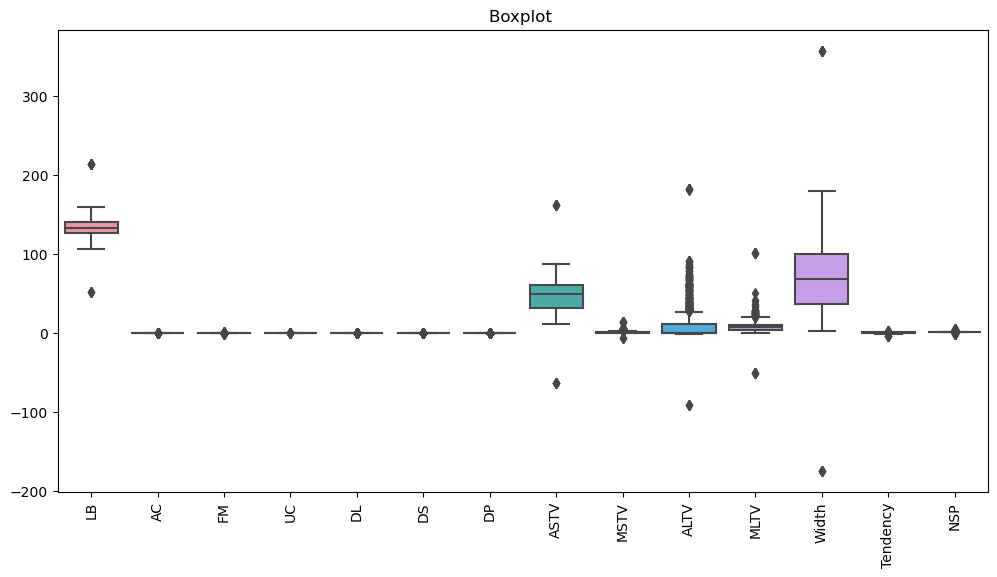

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data2)
plt.xticks(rotation=90)
plt.title("Boxplot ")
plt.show()

### Summary of Insights:
LB, ASTV, ALTV, MLTV, and Width show noticeable outliers and wider variability, suggesting these features might be more informative for fetal health analysis.

Negative and extreme values in 'Width' and unusually high values in ALTV and LB should be investigated or treated during preprocessing.

The majority of other variables have compact distributions and low variability.

In [22]:
from scipy.stats import iqr

### Function to detect and remove outliers

In [25]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [26]:
numeric_cols = data2.select_dtypes(include=['int64', 'float64']).columns
df = remove_outliers_iqr(data2, numeric_cols)

In [27]:
print(f"Rows before outlier removal: {data2.shape[0]}, after: {df.shape[0]}")

Rows before outlier removal: 2124, after: 882


### Note:
This means 1242 records (about 58.5%) were identified as outliers based on the criteria you applied (likely using the IQR method or similar from the boxplots) and subsequently removed from the dataset.

 While removing outliers can improve the quality of statistical analysis by minimizing the influence of extreme values, discarding over half the dataset may risk losing valuable information. In clinical contexts, outliers might represent critical cases that should be analyzed separately rather than removed. A careful balance between data cleaning and preserving clinical significance is necessary.

### Correlation Heatmap

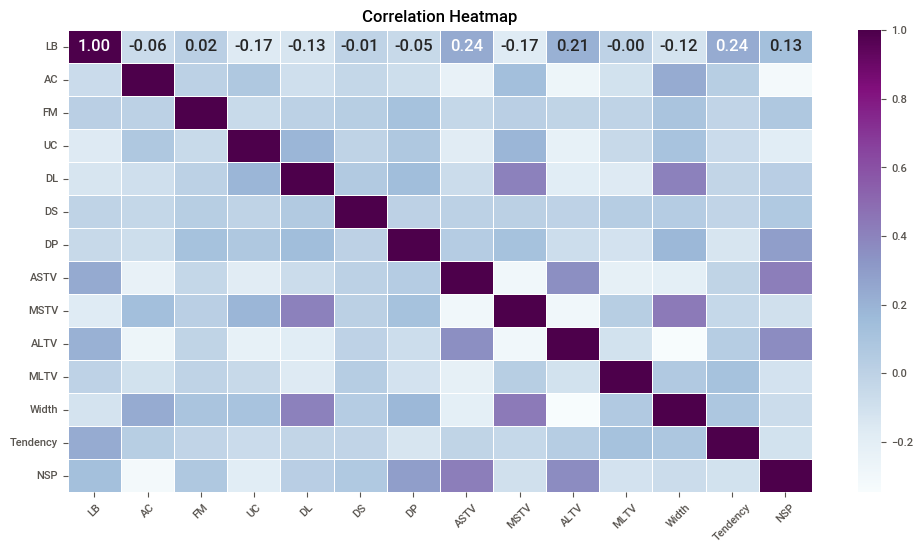

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(data2.corr(), cmap='BuPu', annot=True, linewidths=0.5, fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)  
plt.yticks(rotation=0)
plt.show()

In [32]:
correlation_matrix = data2.corr()
print("\nHigh Correlation Variables:")
correlation_matrix[abs(correlation_matrix) > 0.3]


High Correlation Variables:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.312189
FM,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.410216,NaN,NaN,0.408427,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.357310,NaN,NaN,NaN,0.421175
MSTV,NaN,NaN,NaN,NaN,0.410216,NaN,NaN,NaN,1.000000,NaN,NaN,0.433232,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357310,NaN,1.000000,NaN,-0.346496,NaN,0.365218


### Implications:

A mild positive relationship between LB and ASTV suggests that as the baseline fetal heart rate increases, there might be a slight tendency for abnormal short-term variability to increase. This could have clinical relevance, as higher variability may indicate fetal distress or abnormal autonomic regulation.

A similar weak relationship between LB and Width indicates that higher heart rates might be associated with wider signal widths, possibly reflecting broader signal characteristics during monitoring.

The correlation between ASTV and Width further supports this, hinting that periods of abnormal variability might affect signal characteristics.

Note:
None of the correlation values exceed 0.5, so while these relationships exist, they are not strong enough to suggest direct dependency.

#### Temporal Pattern Analysis
The dataset does not contain an explicit time-based or sequential variable (such as timestamps or monitoring duration), so no trends or patterns over time could be assessed.

## Conclusion
Through this exploratory data analysis of the cardiographic dataset, several important insights and patterns have been identified:

### Distribution Patterns:

Most of the variables exhibit non-normal, right-skewed distributions with a significant concentration of values near zero and occasional high-value outliers.

Features like LB (Baseline Fetal Heart Rate), ASTV, and Width display more bell-shaped or moderately spread distributions, making them potentially more stable predictors in modeling.

### Outlier Detection:

Multiple features, including LB, ASTV, MLTV, Width, MSTV, and others, contain numerous outliers.

The presence of these outliers could distort statistical metrics and model behavior, indicating a need for outlier detection and handling (either removal, capping, or transformation).

### Correlation and Relationships:

The correlation heatmap reveals generally weak to moderate relationships between variables.

No strong multicollinearity was detected, but certain variables like LB, ASTV, and Width showed slightly higher correlations with other features, suggesting potential influence in predictive modeling.

### Pairwise Relationships:

The pairplots and scatter plots confirmed that relationships between most variables are non-linear and diffuse, with no clear linear trends.

This observation implies that linear models alone might not fully capture the underlying data patterns, and non-linear or ensemble models could potentially perform better.

### Feature Variability:

Features like Width, LB, and MSTV exhibit higher variance and wider spread, indicating their potential influence on model outcomes.

Conversely, features like AC, FM, DL, DS, and DP show extremely low variability, which might limit their usefulness in certain models and may need to be reassessed during feature selection.

## Impact on Decision-Making and Further Analysis:
### Preprocessing Recommendations:

Apply scaling or normalization to address differing feature ranges.

Perform outlier handling to improve model robustness.

Consider log transformations or power transforms for skewed variables to normalize distributions.

### Model Selection Guidance:

Due to weak linear relationships and visible non-linear patterns, models like Decision Trees, Random Forests, Gradient Boosting, or SVM with non-linear kernels may perform better than strictly linear models.

Evaluate feature importance metrics post-modeling to refine the variable set.

#### Feature Engineering:

Explore derived or composite variables (e.g., combining related features like deceleration types or variability metrics) for improved predictive power.

Consider binning or categorizing extremely sparse variables like AC, FM, DS, and DP to simplify their contribution in classification models.

 In summary, the EDA provided valuable direction for data preprocessing, modeling strategy, and feature selection, which will help ensure that subsequent predictive or diagnostic models are both accurate and interpretable in the clinical context of fetal health monitoring.

